In [75]:
import tensorflow as tf 
mnist = tf.keras.datasets.mnist

In [76]:
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [77]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [78]:
print((X_train.shape,Y_train.shape,X_test.shape,Y_test.shape))

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


In [79]:
X_train=X_train/255.0
X_test=X_test/255.0

In [80]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [82]:
model.fit(X_train,Y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.9136
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1399 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1038 - accuracy: 0.9687
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0845 - accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0714 - accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0619 - accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0554 - accuracy: 0.9821
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0489 - accuracy: 0.9835
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0449 - accuracy: 0.9855
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.041

In [83]:
model.evaluate(X_test,Y_test)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9797


0.9797000288963318

In [84]:
from google.colab import files
uploaded = files.upload

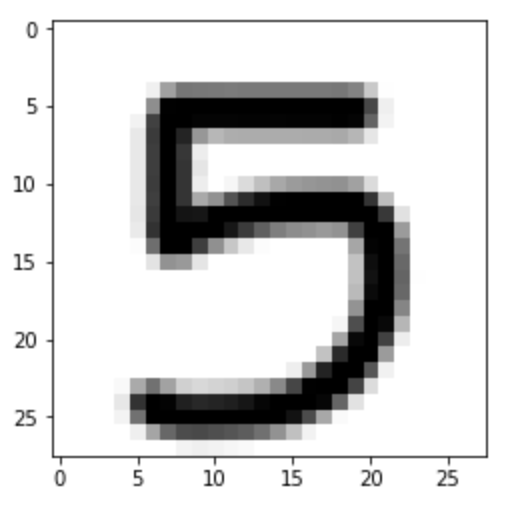

In [85]:
from google.colab.patches import cv2_imshow
img = cv2.imread('Five.png',1)
cv2_imshow(img)

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img.copy(), 75, 255, cv2.THRESH_BINARY_INV)

In [ ]:
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(img.shape[:2], dtype=img.dtype)
preprocessed_digits = []
for c in contours:
    if cv2.contourArea(c) > 20:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(img, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
        cv2.drawContours(mask, [c], 0, (255), -1)
        digit = thresh[y:y+h, x:x+w]
        resized_digit = cv2.resize(digit, (18,18))
        resized_digit = cv2.resize(digit, (18,18))
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
        preprocessed_digits.append(padded_digit)
    inp = np.array(preprocessed_digits)

In [88]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))

In [89]:
prediction

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [90]:
print(('Predicted Number:',np.argmax(prediction)))

('Predicted Number:', 5)


In [91]:
from matplotlib import pyplot
from keras.datasets import cifar10

In [92]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [93]:
print((X_train.shape,Y_train.shape))

((50000, 32, 32, 3), (50000, 1))


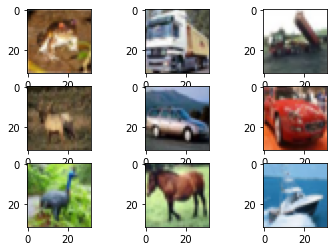

In [94]:
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i])
pyplot.show()

In [95]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [96]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train=X_train/255.0
X_test=X_test/255.0

In [97]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

In [98]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding = 'same' ,activation = 'relu',kernel_constraint = maxnorm(3))) # simple L2 regularization term you penalize high weights with your loss function. With this constraint, you regularize directly. 

model.add(Dropout(0.2)) #Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

model.add(Conv2D(32,(3,3),activation = 'relu' ,padding = 'same' ,kernel_constraint = maxnorm(3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation = 'relu' ,kernel_constraint=maxnorm(3)))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation = 'softmax'))

In [99]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)              

In [101]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7057 - accuracy: 0.3819 - val_loss: 1.4019 - val_accuracy: 0.4986
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3310 - accuracy: 0.5223 - val_loss: 1.2335 - val_accuracy: 0.5576
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1716 - accuracy: 0.5803 - val_loss: 1.1027 - val_accuracy: 0.6080
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0548 - accuracy: 0.6277 - val_loss: 1.0411 - val_accuracy: 0.6293
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9524 - accuracy: 0.6633 - val_loss: 0.9956 - val_accuracy: 0.6470
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8690 - accuracy: 0.6909 - val_loss: 0.9566 - val_accuracy: 0.6641
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7938 - accuracy: 0.7178 - val_loss: 0.9349 -

In [102]:
_,acc=model.evaluate(X_test,Y_test)
print(acc*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.9344 - accuracy: 0.6875
68.75


In [103]:
from google.colab import files
uploaded = files.upload

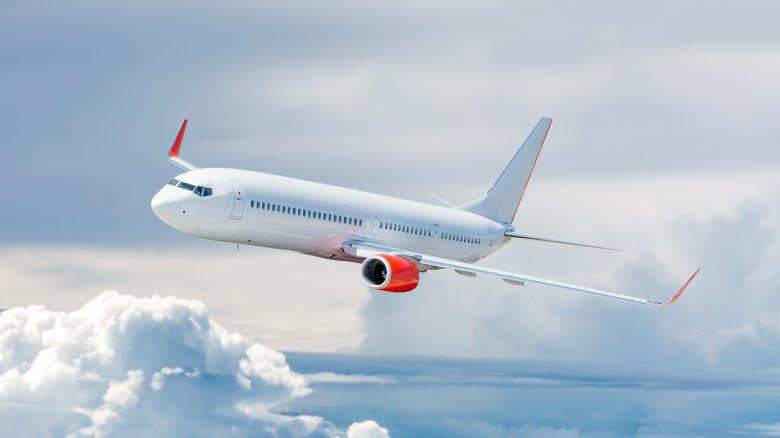

In [104]:
import cv2
img = cv2.imread('Plane.jpg',1)
cv2_imshow(img)
img2 = cv2.resize(img,(32,32))
img2 = np.expand_dims(img2,0)

In [105]:
prediction = model.predict_classes(img2)
predict = str(model.predict_classes(img2))

In [106]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(cifar_classes[int(np.asarray(prediction))])

airplane


In [107]:
!pip install pyngrok

In [108]:
!pip install streamlit

In [109]:
tf.keras.models.save_model(model,'my_model.hdf5')

In [110]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image , ImageOps
import cv2 
import numpy as np

labels =  ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
  
st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def lm():
  
  model = tf.keras.models.load_model('/content/my_model.hdf5')
  return model

model = lm()

st.write("""
  # Cifar 10 Clasifier
""")
file = st.file_uploader("Upload an Image",type=['jpeg','jpg','png'])

def import_and_predict(image_data,model):


  size=(32,32)
  img = ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img = np.asarray(img)
  img = img[np.newaxis,...]
  l = np.argmax(model.predict(img))
  i  = labels[l]
  return i

if file is None:
  st.text("Pls upload image")
else:
  image = Image.open(file)
  st.image(image,use_column_width=True)
  p = import_and_predict(image , model)
  st.success(str(p))

Overwriting app.py


In [111]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
url

http://fd4a0c3cf313.ngrok.io